In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

filepath = '../data/Spotify_Youtube.csv'
data = pd.read_csv(filepath)
data = data.drop(columns=['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Description'])
data.info()
custom_palette = sns.color_palette(["#386641", "#BC4749", "#A7C957", "#F2E8CF", "#6A994E"])
sns.set_palette(custom_palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Title             20248 non-null  object 
 16  Channel           20248 non-null  object

In [159]:
df = data.drop(columns=["Album", "Album_type", "Key", "Loudness", "Speechiness", "Valence", "Danceability", "Acousticness",
                          "Instrumentalness", "Tempo", "Duration_ms", "Channel", "Likes", "Comments", "Licensed", "official_video"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Artist    20718 non-null  object 
 1   Track     20718 non-null  object 
 2   Energy    20716 non-null  float64
 3   Liveness  20716 non-null  float64
 4   Title     20248 non-null  object 
 5   Views     20248 non-null  float64
 6   Stream    20142 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.1+ MB


In [161]:
df2=df.dropna(how="any")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19691 entries, 0 to 20717
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Artist    19691 non-null  object 
 1   Track     19691 non-null  object 
 2   Energy    19691 non-null  float64
 3   Liveness  19691 non-null  float64
 4   Title     19691 non-null  object 
 5   Views     19691 non-null  float64
 6   Stream    19691 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.2+ MB


In [163]:
df2.head()

,Artist,Track,Energy,Liveness,Title,Views,Stream
0,Gorillaz,Feel Good Inc.,0.705,0.6130,Gorillaz - Feel Good Inc. (Official Video),693555221.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,0.703,0.0463,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),0.923,0.1160,Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,0.739,0.0640,Gorillaz - On Melancholy Hill (Official Video),211754952.0,4.346636e+08
4,Gorillaz,Clint Eastwood,0.694,0.0698,Gorillaz - Clint Eastwood (Official Video),618480958.0,6.172597e+08


In [165]:
random_sample = df2.sample(n=500, random_state=1)
random_sample_sorted = random_sample.sort_values(by='Views', ascending=False)
display(random_sample_sorted)

,Artist,Track,Energy,Liveness,Title,Views,Stream
11982,Rihanna,This Is What You Came For,0.9270,0.148,"Calvin Harris, Rihanna - This Is What You Came...",2.626030e+09,1.389244e+09
13036,Katy Perry,Last Friday Night (T.G.I.F.),0.8120,0.667,Katy Perry - Last Friday Night (T.G.I.F.) (Off...,1.454602e+09,7.554063e+08
13490,Lady Gaga,Shallow,0.3850,0.231,"Lady Gaga, Bradley Cooper - Shallow (from A St...",1.410152e+09,2.004339e+09
14047,Bruno Mars,Grenade,0.5580,0.107,Bruno Mars - Grenade (Official Music Video),1.120763e+09,9.350283e+08
15254,The Weeknd,Save Your Tears,0.8260,0.543,The Weeknd - Save Your Tears (Official Music V...,1.060160e+09,1.368122e+09
...,...,...,...,...,...,...,...
5149,Sir Neville Marriner,"Boccherini: String Quintet in E Major, Op. 13 ...",0.0358,0.142,"String Quintet in E Major, Op. 13 No. 6, G. 28...",3.861000e+03,4.647688e+06
12320,Teufelskicker,96 - Tausendundein Tor! - Teil 03,0.6790,0.302,Teufelskicker - Folge 96: Tausendundein Tor! |...,3.455000e+03,1.139300e+05
12319,Teufelskicker,96 - Tausendundein Tor! - Teil 02,0.7750,0.378,Teufelskicker - Folge 96: Tausendundein Tor! |...,3.455000e+03,1.151670e+05
15003,Alex G,Change,0.3140,0.108,change - alex g (unofficial music video),6.450000e+02,1.417954e+07


In [175]:
x_values = random_sample_sorted["Liveness"]
y_values = random_sample_sorted["Stream"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -7854483.34x + 141828657.44


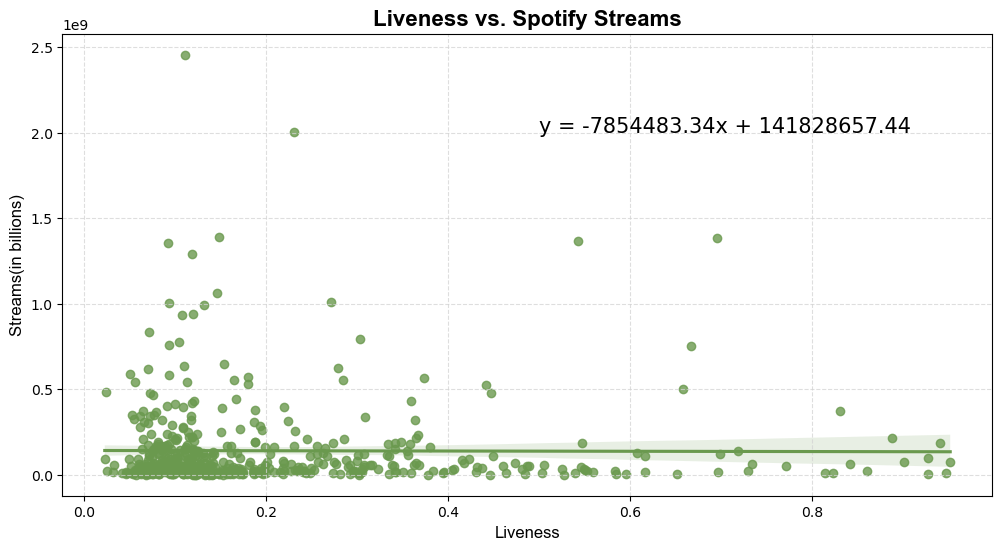

In [177]:
plt.figure(figsize=(12, 6))

sns.regplot(data=random_sample_sorted, x="Liveness", y="Stream", x_ci='ci', scatter=True, fit_reg=True, ci=95, color="#6A994E")
plt.xlabel("Liveness", fontfamily="Arial", fontsize=12)
plt.ylabel("Streams(in billions)", fontfamily="Arial", fontsize=12)
plt.title("Liveness vs. Spotify Streams", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

plt.annotate(line_eq, (0.5, 2.0e9), fontsize=15, color="black")
plt.show()

In [179]:
x_values = random_sample_sorted["Liveness"]
y_values = random_sample_sorted["Views"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 64445742.55x + 81872801.4


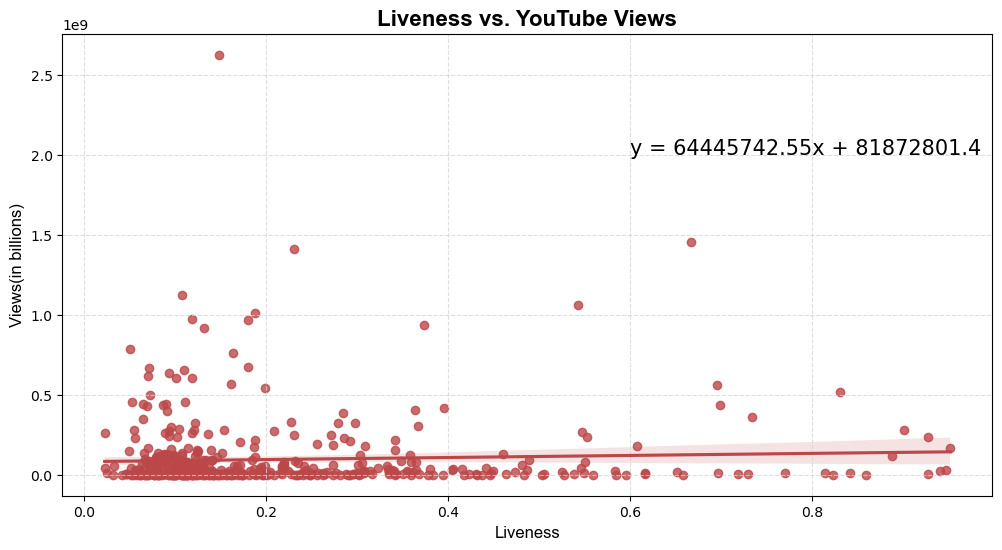

In [181]:
plt.figure(figsize=(12, 6))

sns.regplot(data=random_sample_sorted, x="Liveness", y="Views", x_ci='ci', scatter=True, fit_reg=True, ci=95, color="#BC4749")

plt.xlabel("Liveness", fontfamily="Arial", fontsize=12)
plt.ylabel("Views(in billions)", fontfamily="Arial", fontsize=12)
plt.title("Liveness vs. YouTube Views", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.annotate(line_eq, (0.6, 2.0e9), fontsize=15, color="black")
plt.show()